# Volcanic Forcings and Feedback
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geoscience, Princeton University

In [1]:
%run -im pythonstartup

**2019-04-05T14:13:04.800614**
>>> Importing Python 3.7.2 packages...
[OK]: import sys, os, os.path, datetime, glob
[OK]: import numpy as np-1.16.2
[OK]: import matplotlib as mpl-3.0.3; backend: module://ipykernel.pylab.backend_inline
[OK]: #---import matplotlib.pyplot as plt
[OK]: #---from pylab import *
[OK]: import xarray as xr-0.12.0
[OK]: #---import netCDF4
[OK]: #---import dask
[OK]: #---import bottleneck
[OK]: import pandas as pd-0.24.2
[OK]: from mpl_toolkits.basemap import Basemap
      PROJ_LIB = /tigress/wenchang/miniconda3p7/share/proj
>>>Import packages from Wenchang Yang (wython)...
[OK]: import geoplots as gt
[OK]: from geoplots import geoplot, fxyplot, mapplot, xticksyear
[OK]: import geoxarray
[OK]: import filter
[OK]: import xlearn
[OK]: import mysignal as sig
**Done**


In [6]:
from lib.util import year_shift
import xlearn
from mystats import p2t

%matplotlib notebook

In [2]:
nino_ens = [1, 3, 4, 7, 9, 12, 17, 22, 26, 29]
nina_ens = [2, 5, 6, 8, 10, 11, 16, 23, 27, 30]
neut_ens = [13, 14, 15, 18, 19, 20, 21, 24, 25, 28]

In [4]:
if 'das' in globals() or 'das' in locals():
    pass
else:
    das = dict()

## fig: 3 years since eruption

In [24]:
# data
datanames = ['t_surf', 'precip']
volcs = ['Pinatubo', 'Agung', 'StMaria']
years = [1991, 1963, 1902]
months = [6, 3, 10]
n_years = 3

for dataname in datanames:
    # volc
    ifiles = [f'data/{volc}_PI_ens_noleap.atmos_month.{dataname}.nc'
             for volc in volcs]
    for volc, ifile, yyyy, mm in zip(volcs, ifiles, years, months):
        key = f'{dataname}_{volc}'
        print(key)
        tspan = slice(f'{yyyy}-{mm:02d}', f'{yyyy+n_years}-{mm-1:02d}')
        da = xr.open_dataarray(ifile).sel(time=tspan).mean('time')
        das[key] = da

    # # volc_nudge
    # ifiles = [f'data/{volc}_ens_noleap_nudgeclimo_all_model1860.atmos_month.{dataname}.nc'
    #          for volc in volcs]
    # for volc, ifile, yyyy, mm in zip(volcs, ifiles, years, months):
    #     key = f'{volc}_nudge_{dataname}'
    #     print(key)
    #     tspan = slice(f'{yyyy+1}-{mm:02d}', f'{yyyy+1+n_years}-{mm-1:02d}')
    #     da = xr.open_dataarray(ifile).sel(time=tspan).mean('time')
    #     das[key] = da

    # ctl
    ifile = f'data/CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    for volc, yyyy, mm in zip(volcs, years, months):
        key = f'{dataname}_{volc}_ctl'
        print(key)
        tspan = slice(mm-1, mm-1+n_years*12)
        da = xr.open_dataarray(ifile).isel(time=tspan).mean('time')
        das[key] = da

    # # ctl_nudge
    # ifile = f'data/nudgeclimo_all_model_CTL1860_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    # for volc, yyyy, mm in zip(volcs, years, months):
    #     key = f'{volc}_nudge_ctl_{dataname}'
    #     print(key)
    #     tspan = slice(mm-1+12, mm-1+12+n_years*12)
    #     da = xr.open_dataarray(ifile).isel(time=tspan).mean('time')
    #     das[key] = da

t_surf_Pinatubo
t_surf_Agung
t_surf_StMaria
t_surf_Pinatubo_ctl
t_surf_Agung_ctl
t_surf_StMaria_ctl
precip_Pinatubo
precip_Agung
precip_StMaria
precip_Pinatubo_ctl
precip_Agung_ctl
precip_StMaria_ctl


<IPython.core.display.Javascript object>


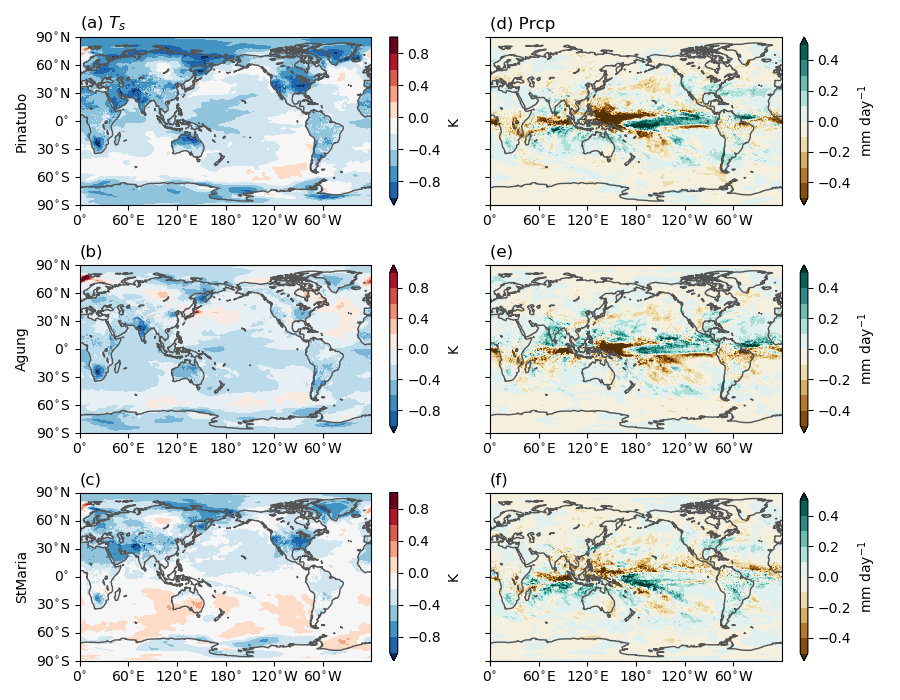

<xarray.DataArray ()>
array(-0.3542242188637276)
<xarray.DataArray ()>
array(-0.2131387696468206)
<xarray.DataArray ()>
array(-0.19598839596431022)
<xarray.DataArray ()>
array(-2.820136032175891e-07)
<xarray.DataArray ()>
array(-1.7945712769217778e-07)
<xarray.DataArray ()>
array(-1.2495312848911783e-07)


In [20]:
# plot
fig, axes = plt.subplots(3, 2, figsize=(9, 7), sharey=True)
dataname = 't_surf'
units = 'K'
levels = np.arange(-1, 1.1, .2)

ax = axes[0, 0]
plt.sca(ax)
volc = 'Pinatubo'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').rename(units).plot(robust=True, levels=levels, center=0, ax=ax, rasterized=True)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel(f'{volc}')
ax.set_title(f'(a) $T_s$', loc='left')

ax = axes[1, 0]
plt.sca(ax)
volc = 'Agung'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').rename(units).plot(robust=True, levels=levels, center=0, ax=ax, rasterized=True)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel(f'{volc}')
ax.set_title(f'(b)', loc='left')

ax = axes[2, 0]
plt.sca(ax)
volc = 'StMaria'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').rename(units).plot(robust=True, levels=levels, center=0, ax=ax, rasterized=True)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel(f'{volc}')
ax.set_title(f'(c)', loc='left')


dataname = 'precip'
scale = 24*3600
units = 'mm day$^{-1}$'
levels = np.arange(-.5, .51, .1)

ax = axes[0, 1]
plt.sca(ax)
volc = 'Pinatubo'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
da.mean('en').pipe(lambda x: x*scale).rename(units).plot(robust=True, 
                                                         levels=levels, 
                                                         center=0, 
                                                         ax=ax,
                                                         cmap='BrBG',
                                                         rasterized=True
                                                        )
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(d) Prcp', loc='left')

ax = axes[1, 1]
plt.sca(ax)
volc = 'Agung'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').pipe(lambda x: x*scale).rename(units).plot(robust=True, 
                                                         levels=levels, 
                                                         center=0, 
                                                         ax=ax,
                                                         cmap='BrBG',
                                                         rasterized=True
                                                        )
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(e) ', loc='left')

ax = axes[2, 1]
plt.sca(ax)
volc = 'StMaria'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').pipe(lambda x: x*scale).rename(units).plot(robust=True, 
                                                         levels=levels, 
                                                         center=0, 
                                                         ax=ax,
                                                         cmap='BrBG',
                                                         rasterized=True
                                                        )
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(f)', loc='left')

plt.tight_layout()

figname = f'figs/fig_maps_TP.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


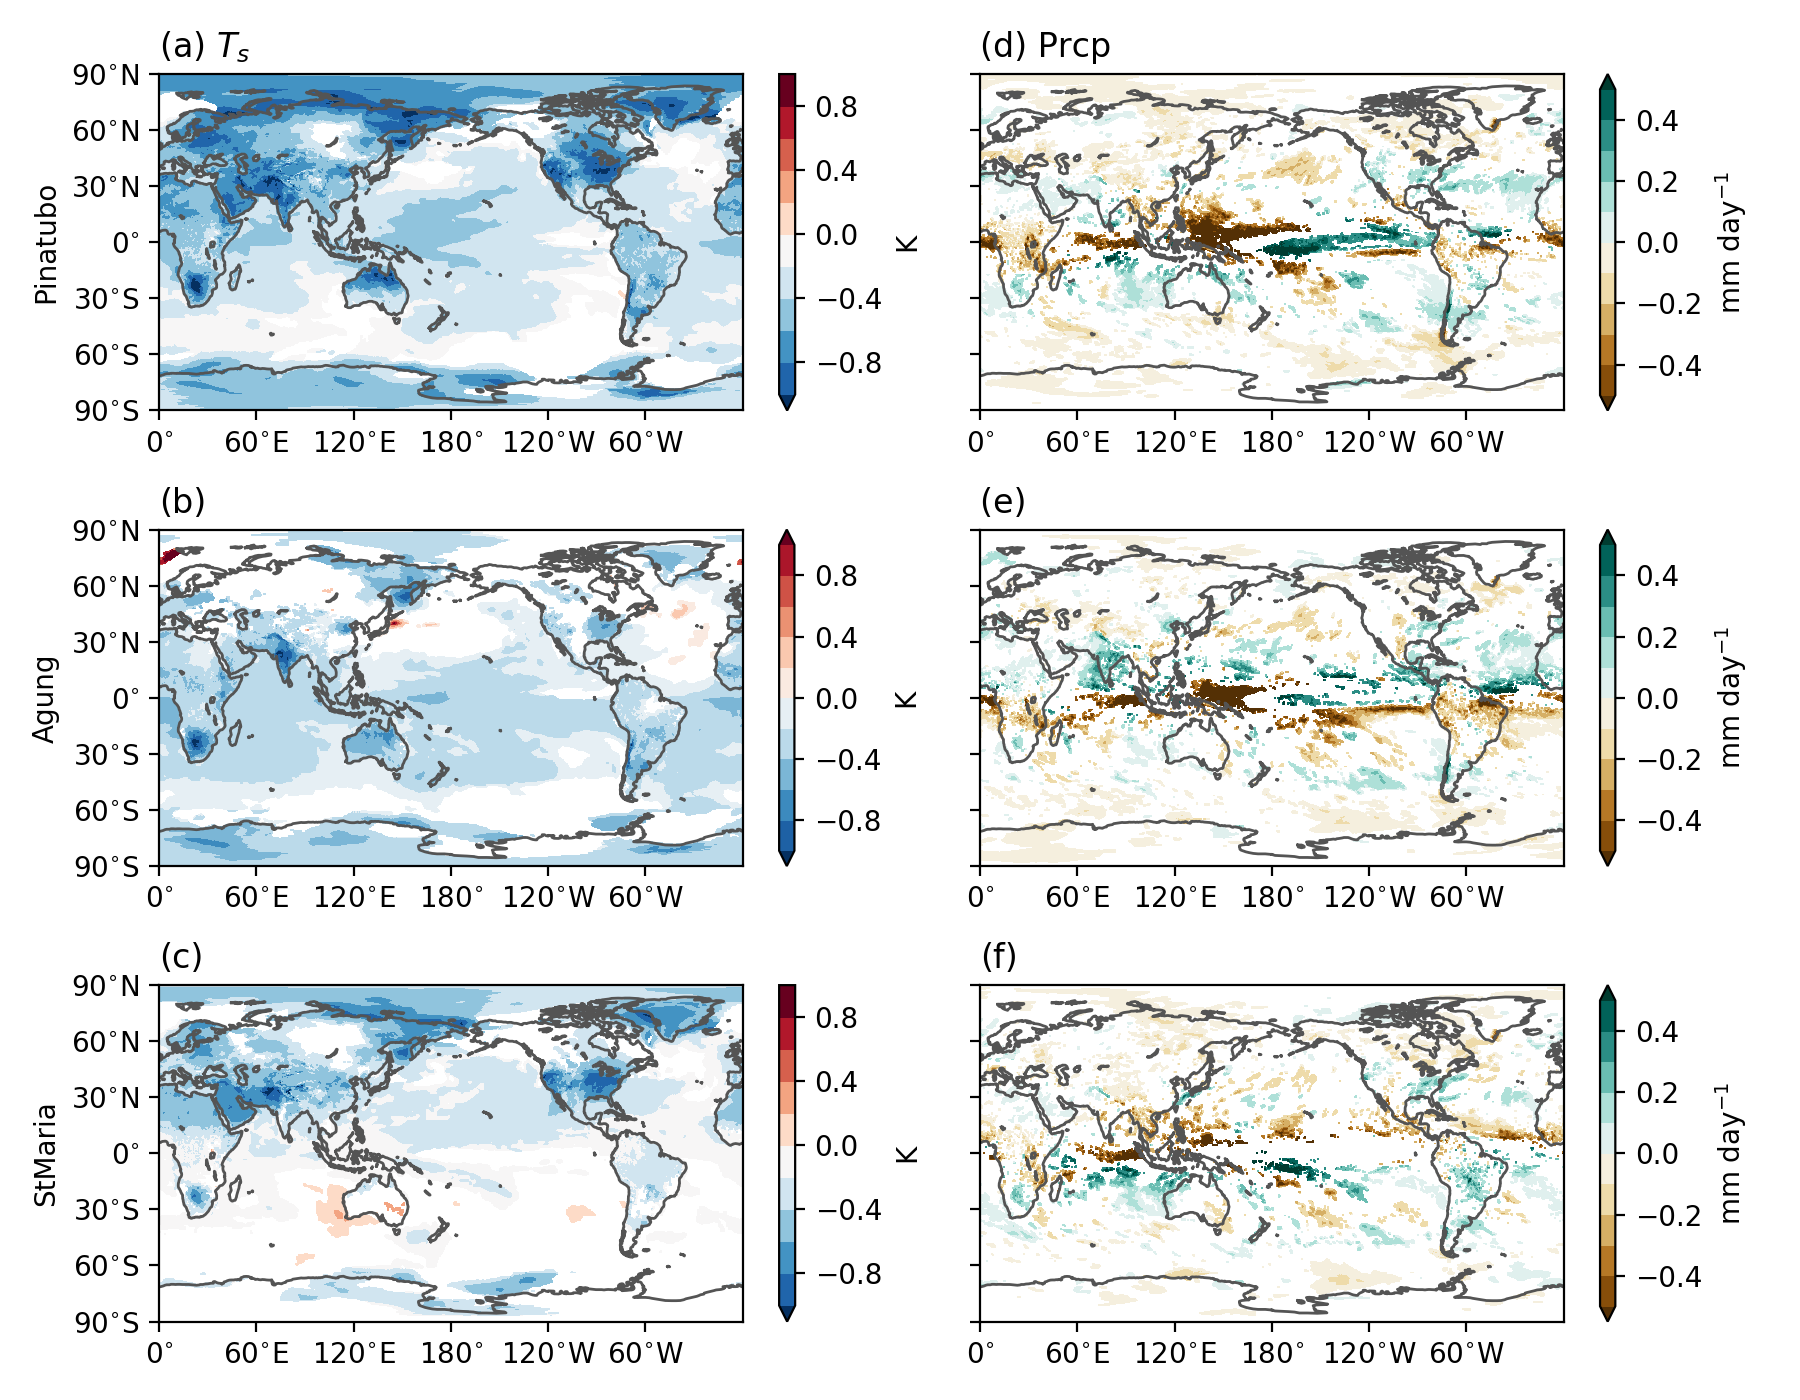

<xarray.DataArray ()>
array(-0.354224)
<xarray.DataArray ()>
array(-0.213139)
<xarray.DataArray ()>
array(-0.195988)
<xarray.DataArray ()>
array(-2.820136e-07)
<xarray.DataArray ()>
array(-1.794571e-07)
<xarray.DataArray ()>
array(-1.249531e-07)


In [32]:
# plot revision_1 significance
fig, axes = plt.subplots(3, 2, figsize=(9, 7), sharey=True)
dataname = 't_surf'
units = 'K'
levels = np.arange(-1, 1.1, .2)

ax = axes[0, 0]
plt.sca(ax)
volc = 'Pinatubo'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
# n_ens = da.en.size
spread = p2t(0.05, df=n_ens-1) * da.std('en') * n_ens**(-1/2)
L = np.abs( da.mean('en') ) > spread
da.mean('en').where(L).rename(units).plot(robust=True, levels=levels, center=0, ax=ax, rasterized=True)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel(f'{volc}')
ax.set_title(f'(a) $T_s$', loc='left')

ax = axes[1, 0]
plt.sca(ax)
volc = 'Agung'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
spread = p2t(0.05, df=n_ens-1) * da.std('en') * n_ens**(-1/2)
L = np.abs( da.mean('en') ) > spread
da.mean('en').where(L).rename(units).plot(robust=True, levels=levels, center=0, ax=ax, rasterized=True)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel(f'{volc}')
ax.set_title(f'(b)', loc='left')

ax = axes[2, 0]
plt.sca(ax)
volc = 'StMaria'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
spread = p2t(0.05, df=n_ens-1) * da.std('en') * n_ens**(-1/2)
L = np.abs( da.mean('en') ) > spread
da.mean('en').where(L).rename(units).plot(robust=True, levels=levels, center=0, ax=ax, rasterized=True)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel(f'{volc}')
ax.set_title(f'(c)', loc='left')


dataname = 'precip'
scale = 24*3600
units = 'mm day$^{-1}$'
levels = np.arange(-.5, .51, .1)

ax = axes[0, 1]
plt.sca(ax)
volc = 'Pinatubo'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
spread = p2t(0.05, df=n_ens-1) * da.std('en') * n_ens**(-1/2)
L = np.abs( da.mean('en') ) > spread
da.mean('en').where(L).pipe(lambda x: x*scale).rename(units).plot(robust=True, 
                                                         levels=levels, 
                                                         center=0, 
                                                         ax=ax,
                                                         cmap='BrBG',
                                                         rasterized=True
                                                        )
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(d) Prcp', loc='left')

ax = axes[1, 1]
plt.sca(ax)
volc = 'Agung'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
spread = p2t(0.05, df=n_ens-1) * da.std('en') * n_ens**(-1/2)
L = np.abs( da.mean('en') ) > spread
da.mean('en').where(L).pipe(lambda x: x*scale).rename(units).plot(robust=True, 
                                                         levels=levels, 
                                                         center=0, 
                                                         ax=ax,
                                                         cmap='BrBG',
                                                         rasterized=True
                                                        )
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(e) ', loc='left')

ax = axes[2, 1]
plt.sca(ax)
volc = 'StMaria'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
spread = p2t(0.05, df=n_ens-1) * da.std('en') * n_ens**(-1/2)
L = np.abs( da.mean('en') ) > spread
da.mean('en').where(L).pipe(lambda x: x*scale).rename(units).plot(robust=True, 
                                                         levels=levels, 
                                                         center=0, 
                                                         ax=ax,
                                                         cmap='BrBG',
                                                         rasterized=True
                                                        )
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(f)', loc='left')

plt.tight_layout()

figname = f'figs/fig_maps_TP_sig.pdf'
plt.savefig(figname)

## fig: 18 months since eruption

In [37]:
# data
datanames = ['t_surf', 'precip']
volcs = ['Pinatubo', 'Agung', 'StMaria']
years = [1902, 1963, 1991]
months = [10, 3, 6]
n_months = 18

for dataname in datanames:
    # volc
    ifiles = [f'data/{volc}_PI_ens_noleap.atmos_month.{dataname}.nc'
             for volc in volcs]
    for volc, ifile, yyyy, mm in zip(volcs, ifiles, years, months):
        key = f'{dataname}_{volc}_{n_months}months'
        print(key)
        tspan = slice(mm-1, mm-1+ n_months)
        da = xr.open_dataarray(ifile).isel(time=tspan).mean('time')
        das[key] = da

    # # volc_nudge
    # ifiles = [f'data/{volc}_ens_noleap_nudgeclimo_all_model1860.atmos_month.{dataname}.nc'
    #          for volc in volcs]
    # for volc, ifile, yyyy, mm in zip(volcs, ifiles, years, months):
    #     key = f'{volc}_nudge_{dataname}'
    #     print(key)
    #     tspan = slice(f'{yyyy+1}-{mm:02d}', f'{yyyy+1+n_years}-{mm-1:02d}')
    #     da = xr.open_dataarray(ifile).sel(time=tspan).mean('time')
    #     das[key] = da

    # ctl
    ifile = f'data/CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    for volc, yyyy, mm in zip(volcs, years, months):
        key = f'{dataname}_{volc}_{n_months}months_ctl'
        print(key)
        tspan = slice(mm-1, mm-1+n_months)
        da = xr.open_dataarray(ifile).isel(time=tspan).mean('time')
        das[key] = da

    # # ctl_nudge
    # ifile = f'data/nudgeclimo_all_model_CTL1860_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    # for volc, yyyy, mm in zip(volcs, years, months):
    #     key = f'{volc}_nudge_ctl_{dataname}'
    #     print(key)
    #     tspan = slice(mm-1+12, mm-1+12+n_years*12)
    #     da = xr.open_dataarray(ifile).isel(time=tspan).mean('time')
    #     das[key] = da

t_surf_Pinatubo_18months
t_surf_Agung_18months
t_surf_StMaria_18months
t_surf_Pinatubo_18months_ctl


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


t_surf_Agung_18months_ctl
t_surf_StMaria_18months_ctl
precip_Pinatubo_18months
precip_Agung_18months
precip_StMaria_18months
precip_Pinatubo_18months_ctl
precip_Agung_18months_ctl
precip_StMaria_18months_ctl


<IPython.core.display.Javascript object>


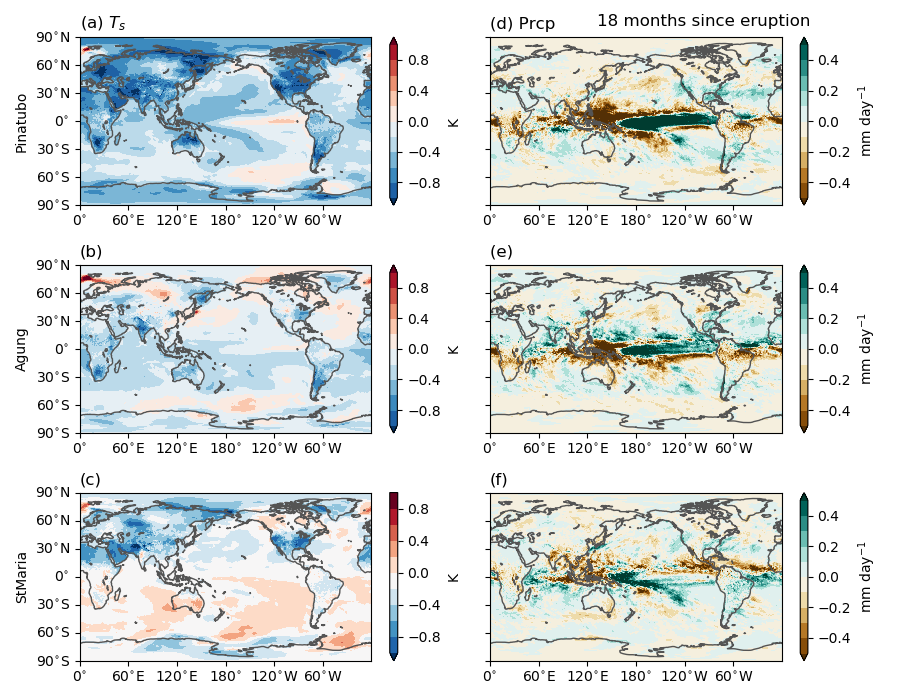

<xarray.DataArray ()>
array(-0.36582611928694764)
<xarray.DataArray ()>
array(-0.1730459236230744)
<xarray.DataArray ()>
array(-0.1549671247901053)
<xarray.DataArray ()>
array(-2.532669814212385e-07)
<xarray.DataArray ()>
array(-1.3911199463741663e-07)
<xarray.DataArray ()>
array(-5.7199503893833496e-08)


In [38]:
# plot
fig, axes = plt.subplots(3, 2, figsize=(9, 7), sharey=True)
dataname = 't_surf'
units = 'K'
levels = np.arange(-1, 1.1, .2)

ax = axes[0, 0]
plt.sca(ax)
volc = 'Pinatubo'

keyv, keyc = f'{dataname}_{volc}_{n_months}months', f'{dataname}_{volc}_{n_months}months_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').rename(units).plot(robust=True, levels=levels, center=0, ax=ax, rasterized=True)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel(f'{volc}')
ax.set_title(f'(a) $T_s$', loc='left')

ax = axes[1, 0]
plt.sca(ax)
volc = 'Agung'

keyv, keyc = f'{dataname}_{volc}_{n_months}months', f'{dataname}_{volc}_{n_months}months_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').rename(units).plot(robust=True, levels=levels, center=0, ax=ax, rasterized=True)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel(f'{volc}')
ax.set_title(f'(b)', loc='left')

ax = axes[2, 0]
plt.sca(ax)
volc = 'StMaria'

keyv, keyc = f'{dataname}_{volc}_{n_months}months', f'{dataname}_{volc}_{n_months}months_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').rename(units).plot(robust=True, levels=levels, center=0, ax=ax, rasterized=True)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel(f'{volc}')
ax.set_title(f'(c)', loc='left')


dataname = 'precip'
scale = 24*3600
units = 'mm day$^{-1}$'
levels = np.arange(-.5, .51, .1)

ax = axes[0, 1]
plt.sca(ax)
volc = 'Pinatubo'

keyv, keyc = f'{dataname}_{volc}_{n_months}months', f'{dataname}_{volc}_{n_months}months_ctl'
da = das[keyv] - das[keyc]
da.mean('en').pipe(lambda x: x*scale).rename(units).plot(robust=True, 
                                                         levels=levels, 
                                                         center=0, 
                                                         ax=ax,
                                                         cmap='BrBG',
                                                         rasterized=True
                                                        )
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(d) Prcp', loc='left')

ax = axes[1, 1]
plt.sca(ax)
volc = 'Agung'

keyv, keyc = f'{dataname}_{volc}_{n_months}months', f'{dataname}_{volc}_{n_months}months_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').pipe(lambda x: x*scale).rename(units).plot(robust=True, 
                                                         levels=levels, 
                                                         center=0, 
                                                         ax=ax,
                                                         cmap='BrBG',
                                                         rasterized=True
                                                        )
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(e) ', loc='left')

ax = axes[2, 1]
plt.sca(ax)
volc = 'StMaria'

keyv, keyc = f'{dataname}_{volc}_{n_months}months', f'{dataname}_{volc}_{n_months}months_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').pipe(lambda x: x*scale).rename(units).plot(robust=True, 
                                                         levels=levels, 
                                                         center=0, 
                                                         ax=ax,
                                                         cmap='BrBG',
                                                         rasterized=True
                                                        )
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(f)', loc='left')

plt.suptitle('18 months since eruption', x='.9', ha='right')

plt.tight_layout()

figname = f'figs/fig_maps_TP_{n_months}months.pdf'
plt.savefig(figname)

## fig: 18-36 months since eruption

In [34]:
# data
datanames = ['t_surf', 'precip']
volcs = ['Pinatubo', 'Agung', 'StMaria']
years = [1902, 1963, 1991]
months = [10, 3, 6]
# n_years = 1.5
n_months0 = 18
n_months1 = 36

for dataname in datanames:
    # volc
    ifiles = [f'data/{volc}_PI_ens_noleap.atmos_month.{dataname}.nc'
             for volc in volcs]
    for volc, ifile, yyyy, mm in zip(volcs, ifiles, years, months):
        key = f'{dataname}_{volc}_{n_months0}-{n_months1}mon'
        print(key)
        tspan = slice(mm-1+n_months0, mm-1+ n_months1)
        da = xr.open_dataarray(ifile).isel(time=tspan).mean('time')
        das[key] = da

    # # volc_nudge
    # ifiles = [f'data/{volc}_ens_noleap_nudgeclimo_all_model1860.atmos_month.{dataname}.nc'
    #          for volc in volcs]
    # for volc, ifile, yyyy, mm in zip(volcs, ifiles, years, months):
    #     key = f'{volc}_nudge_{dataname}'
    #     print(key)
    #     tspan = slice(f'{yyyy+1}-{mm:02d}', f'{yyyy+1+n_years}-{mm-1:02d}')
    #     da = xr.open_dataarray(ifile).sel(time=tspan).mean('time')
    #     das[key] = da

    # ctl
    ifile = f'data/CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    for volc, yyyy, mm in zip(volcs, years, months):
        key = f'{dataname}_{volc}_{n_months0}-{n_months1}mon_ctl'
        print(key)
        tspan = slice(mm-1+n_months0, mm-1+ n_months1)
        da = xr.open_dataarray(ifile).isel(time=tspan).mean('time')
        das[key] = da

    # # ctl_nudge
    # ifile = f'data/nudgeclimo_all_model_CTL1860_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    # for volc, yyyy, mm in zip(volcs, years, months):
    #     key = f'{volc}_nudge_ctl_{dataname}'
    #     print(key)
    #     tspan = slice(mm-1+12, mm-1+12+n_years*12)
    #     da = xr.open_dataarray(ifile).isel(time=tspan).mean('time')
    #     das[key] = da

t_surf_Pinatubo_18-36mon
t_surf_Agung_18-36mon
t_surf_StMaria_18-36mon
t_surf_Pinatubo_18-36mon_ctl


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


t_surf_Agung_18-36mon_ctl
t_surf_StMaria_18-36mon_ctl
precip_Pinatubo_18-36mon
precip_Agung_18-36mon
precip_StMaria_18-36mon
precip_Pinatubo_18-36mon_ctl
precip_Agung_18-36mon_ctl
precip_StMaria_18-36mon_ctl


<IPython.core.display.Javascript object>


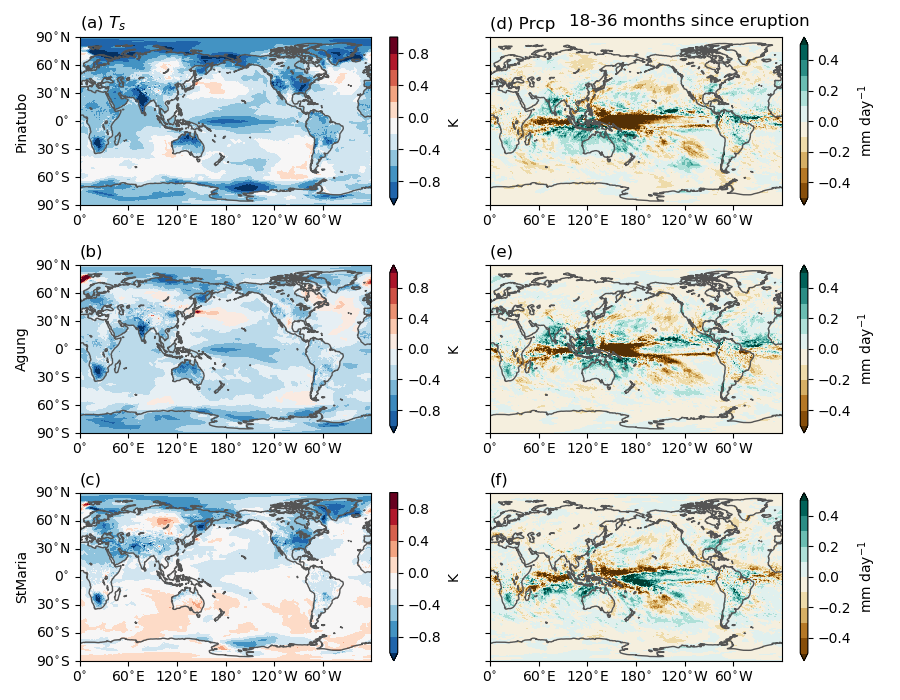

<xarray.DataArray ()>
array(-0.3937417800674684)
<xarray.DataArray ()>
array(-0.2532316121322928)
<xarray.DataArray ()>
array(-0.20042861144798724)
<xarray.DataArray ()>
array(-3.8491131248282643e-07)
<xarray.DataArray ()>
array(-2.198022610025778e-07)
<xarray.DataArray ()>
array(-1.6032798386993648e-07)


In [36]:
# plot
fig, axes = plt.subplots(3, 2, figsize=(9, 7), sharey=True)
dataname = 't_surf'
units = 'K'
levels = np.arange(-1, 1.1, .2)

ax = axes[0, 0]
plt.sca(ax)
volc = 'Pinatubo'

keyv, keyc = f'{dataname}_{volc}_{n_months0}-{n_months1}mon', f'{dataname}_{volc}_{n_months0}-{n_months1}mon_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').rename(units).plot(robust=True, levels=levels, center=0, ax=ax, rasterized=True)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel(f'{volc}')
ax.set_title(f'(a) $T_s$', loc='left')

ax = axes[1, 0]
plt.sca(ax)
volc = 'Agung'

keyv, keyc = f'{dataname}_{volc}_{n_months0}-{n_months1}mon', f'{dataname}_{volc}_{n_months0}-{n_months1}mon_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').rename(units).plot(robust=True, levels=levels, center=0, ax=ax, rasterized=True)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel(f'{volc}')
ax.set_title(f'(b)', loc='left')

ax = axes[2, 0]
plt.sca(ax)
volc = 'StMaria'

keyv, keyc = f'{dataname}_{volc}_{n_months0}-{n_months1}mon', f'{dataname}_{volc}_{n_months0}-{n_months1}mon_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').rename(units).plot(robust=True, levels=levels, center=0, ax=ax, rasterized=True)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel(f'{volc}')
ax.set_title(f'(c)', loc='left')


dataname = 'precip'
scale = 24*3600
units = 'mm day$^{-1}$'
levels = np.arange(-.5, .51, .1)

ax = axes[0, 1]
plt.sca(ax)
volc = 'Pinatubo'

keyv, keyc = f'{dataname}_{volc}_{n_months0}-{n_months1}mon', f'{dataname}_{volc}_{n_months0}-{n_months1}mon_ctl'
da = das[keyv] - das[keyc]
da.mean('en').pipe(lambda x: x*scale).rename(units).plot(robust=True, 
                                                         levels=levels, 
                                                         center=0, 
                                                         ax=ax,
                                                         cmap='BrBG',
                                                         rasterized=True
                                                        )
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(d) Prcp', loc='left')

ax = axes[1, 1]
plt.sca(ax)
volc = 'Agung'

keyv, keyc = f'{dataname}_{volc}_{n_months0}-{n_months1}mon', f'{dataname}_{volc}_{n_months0}-{n_months1}mon_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').pipe(lambda x: x*scale).rename(units).plot(robust=True, 
                                                         levels=levels, 
                                                         center=0, 
                                                         ax=ax,
                                                         cmap='BrBG',
                                                         rasterized=True
                                                        )
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(e) ', loc='left')

ax = axes[2, 1]
plt.sca(ax)
volc = 'StMaria'

keyv, keyc = f'{dataname}_{volc}_{n_months0}-{n_months1}mon', f'{dataname}_{volc}_{n_months0}-{n_months1}mon_ctl'
da = das[keyv] - das[keyc]
# da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
#     .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
da.mean('en').pipe(lambda x: x*scale).rename(units).plot(robust=True, 
                                                         levels=levels, 
                                                         center=0, 
                                                         ax=ax,
                                                         cmap='BrBG',
                                                         rasterized=True
                                                        )
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(f)', loc='left')

plt.suptitle('18-36 months since eruption', x='.9', ha='right')

plt.tight_layout()

figname = f'figs/fig_maps_TP_{n_months0}-{n_months1}mon.pdf'
plt.savefig(figname)

In [39]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js">
</script>